<img src="DSyjp7hU0AAhrxS.jpeg" alt="Drawing" style="width: 400px;"/>

In [197]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

<h1>S08 T01: Feature Engineering Task</h1>

**The dataset used in this notebook can be found in Kaggle. Use the below link to access it**


<a href="https://www.kaggle.com/varpit94/football-teams-rankings-stats">Football teams | Rankings | Stats</a>

Each row contains information for a team. The data shows following statistics for each team:

**Team** - Name of team <br>
**Tournament** - Name of tournament <br>
**Goals** - Number of goals scored in the tournament in year 2020-2021 <br>
**Shots pg** - Number of shots per game <br>
**Yellow_cards** - Number of yellow cards given in the tournament in year 2020-2021 <br>
**Red_cards** - Number of red cards given in the tournament in year 2020-2021 <br>
**Possession%** - Percentage of possession <br>
**Pass%** - Percentage of passes <br>
**Aerials won** - Aerial duels won per game. Aerial duels occur when two players contest a ball in the air; this is a symmetrical event because neither player starts with possession. <br>
**Rating** - Overall rating of the team <br>

<h2>Level 1</h2>

In [30]:
df = pd.read_csv("Football teams.csv")

<h3>DEA</h3>

In [31]:
df.head()

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86


In [32]:
df.shape

(98, 10)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          98 non-null     object 
 1   Tournament    98 non-null     object 
 2   Goals         98 non-null     int64  
 3   Shots pg      98 non-null     float64
 4   yellow_cards  98 non-null     int64  
 5   red_cards     98 non-null     int64  
 6   Possession%   98 non-null     float64
 7   Pass%         98 non-null     float64
 8   AerialsWon    98 non-null     float64
 9   Rating        98 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 7.8+ KB


In [34]:
df.isnull().sum()

Team            0
Tournament      0
Goals           0
Shots pg        0
yellow_cards    0
red_cards       0
Possession%     0
Pass%           0
AerialsWon      0
Rating          0
dtype: int64

In [35]:
df.describe()

,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,52.183673,11.851020,69.704082,3.336735,49.995918,80.441837,16.006122,6.646122
std,16.445691,2.149718,15.137316,2.148814,4.890068,4.690172,3.078955,0.132148
min,20.000000,7.100000,40.000000,0.000000,38.500000,66.500000,9.500000,6.410000
25%,40.250000,10.325000,60.000000,2.000000,46.225000,78.025000,14.025000,6.540000
50%,50.000000,11.450000,67.500000,3.000000,49.750000,80.800000,16.100000,6.630000
75%,61.750000,13.350000,80.000000,4.750000,52.850000,83.450000,17.850000,6.730000
max,99.000000,17.100000,117.000000,10.000000,62.400000,89.700000,26.800000,7.010000


In [36]:
df.describe(include="object")

,Team,Tournament
count,98,98
unique,98,5
top,Manchester City,Premier League
freq,1,20


In [37]:
#select the numeric columns of the DF
numeric_cols = df.select_dtypes([np.number]).columns
numeric_cols

Index(['Goals', 'Shots pg', 'yellow_cards', 'red_cards', 'Possession%',
       'Pass%', 'AerialsWon', 'Rating'],
      dtype='object')

In [38]:
#select the categorical columns of the DF
object_cols = df.select_dtypes(["object"]).columns
object_cols

Index(['Team', 'Tournament'], dtype='object')

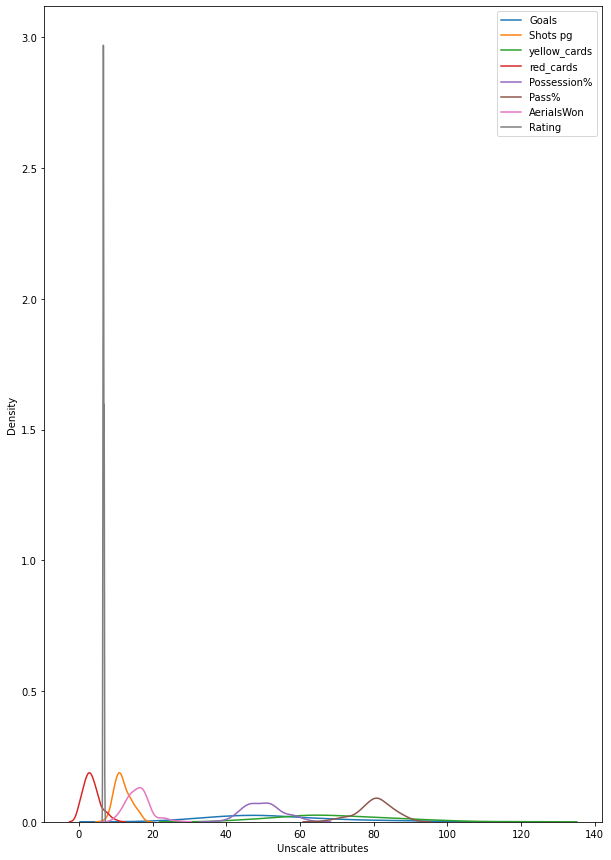

In [39]:
fig, axs = plt.subplots(figsize=(10,15))
for col in numeric_cols:
    sns.kdeplot(df[col])
plt.xlabel('Unscale attributes')
plt.legend(labels=numeric_cols)

The plot shows the big differences in values of the attributes

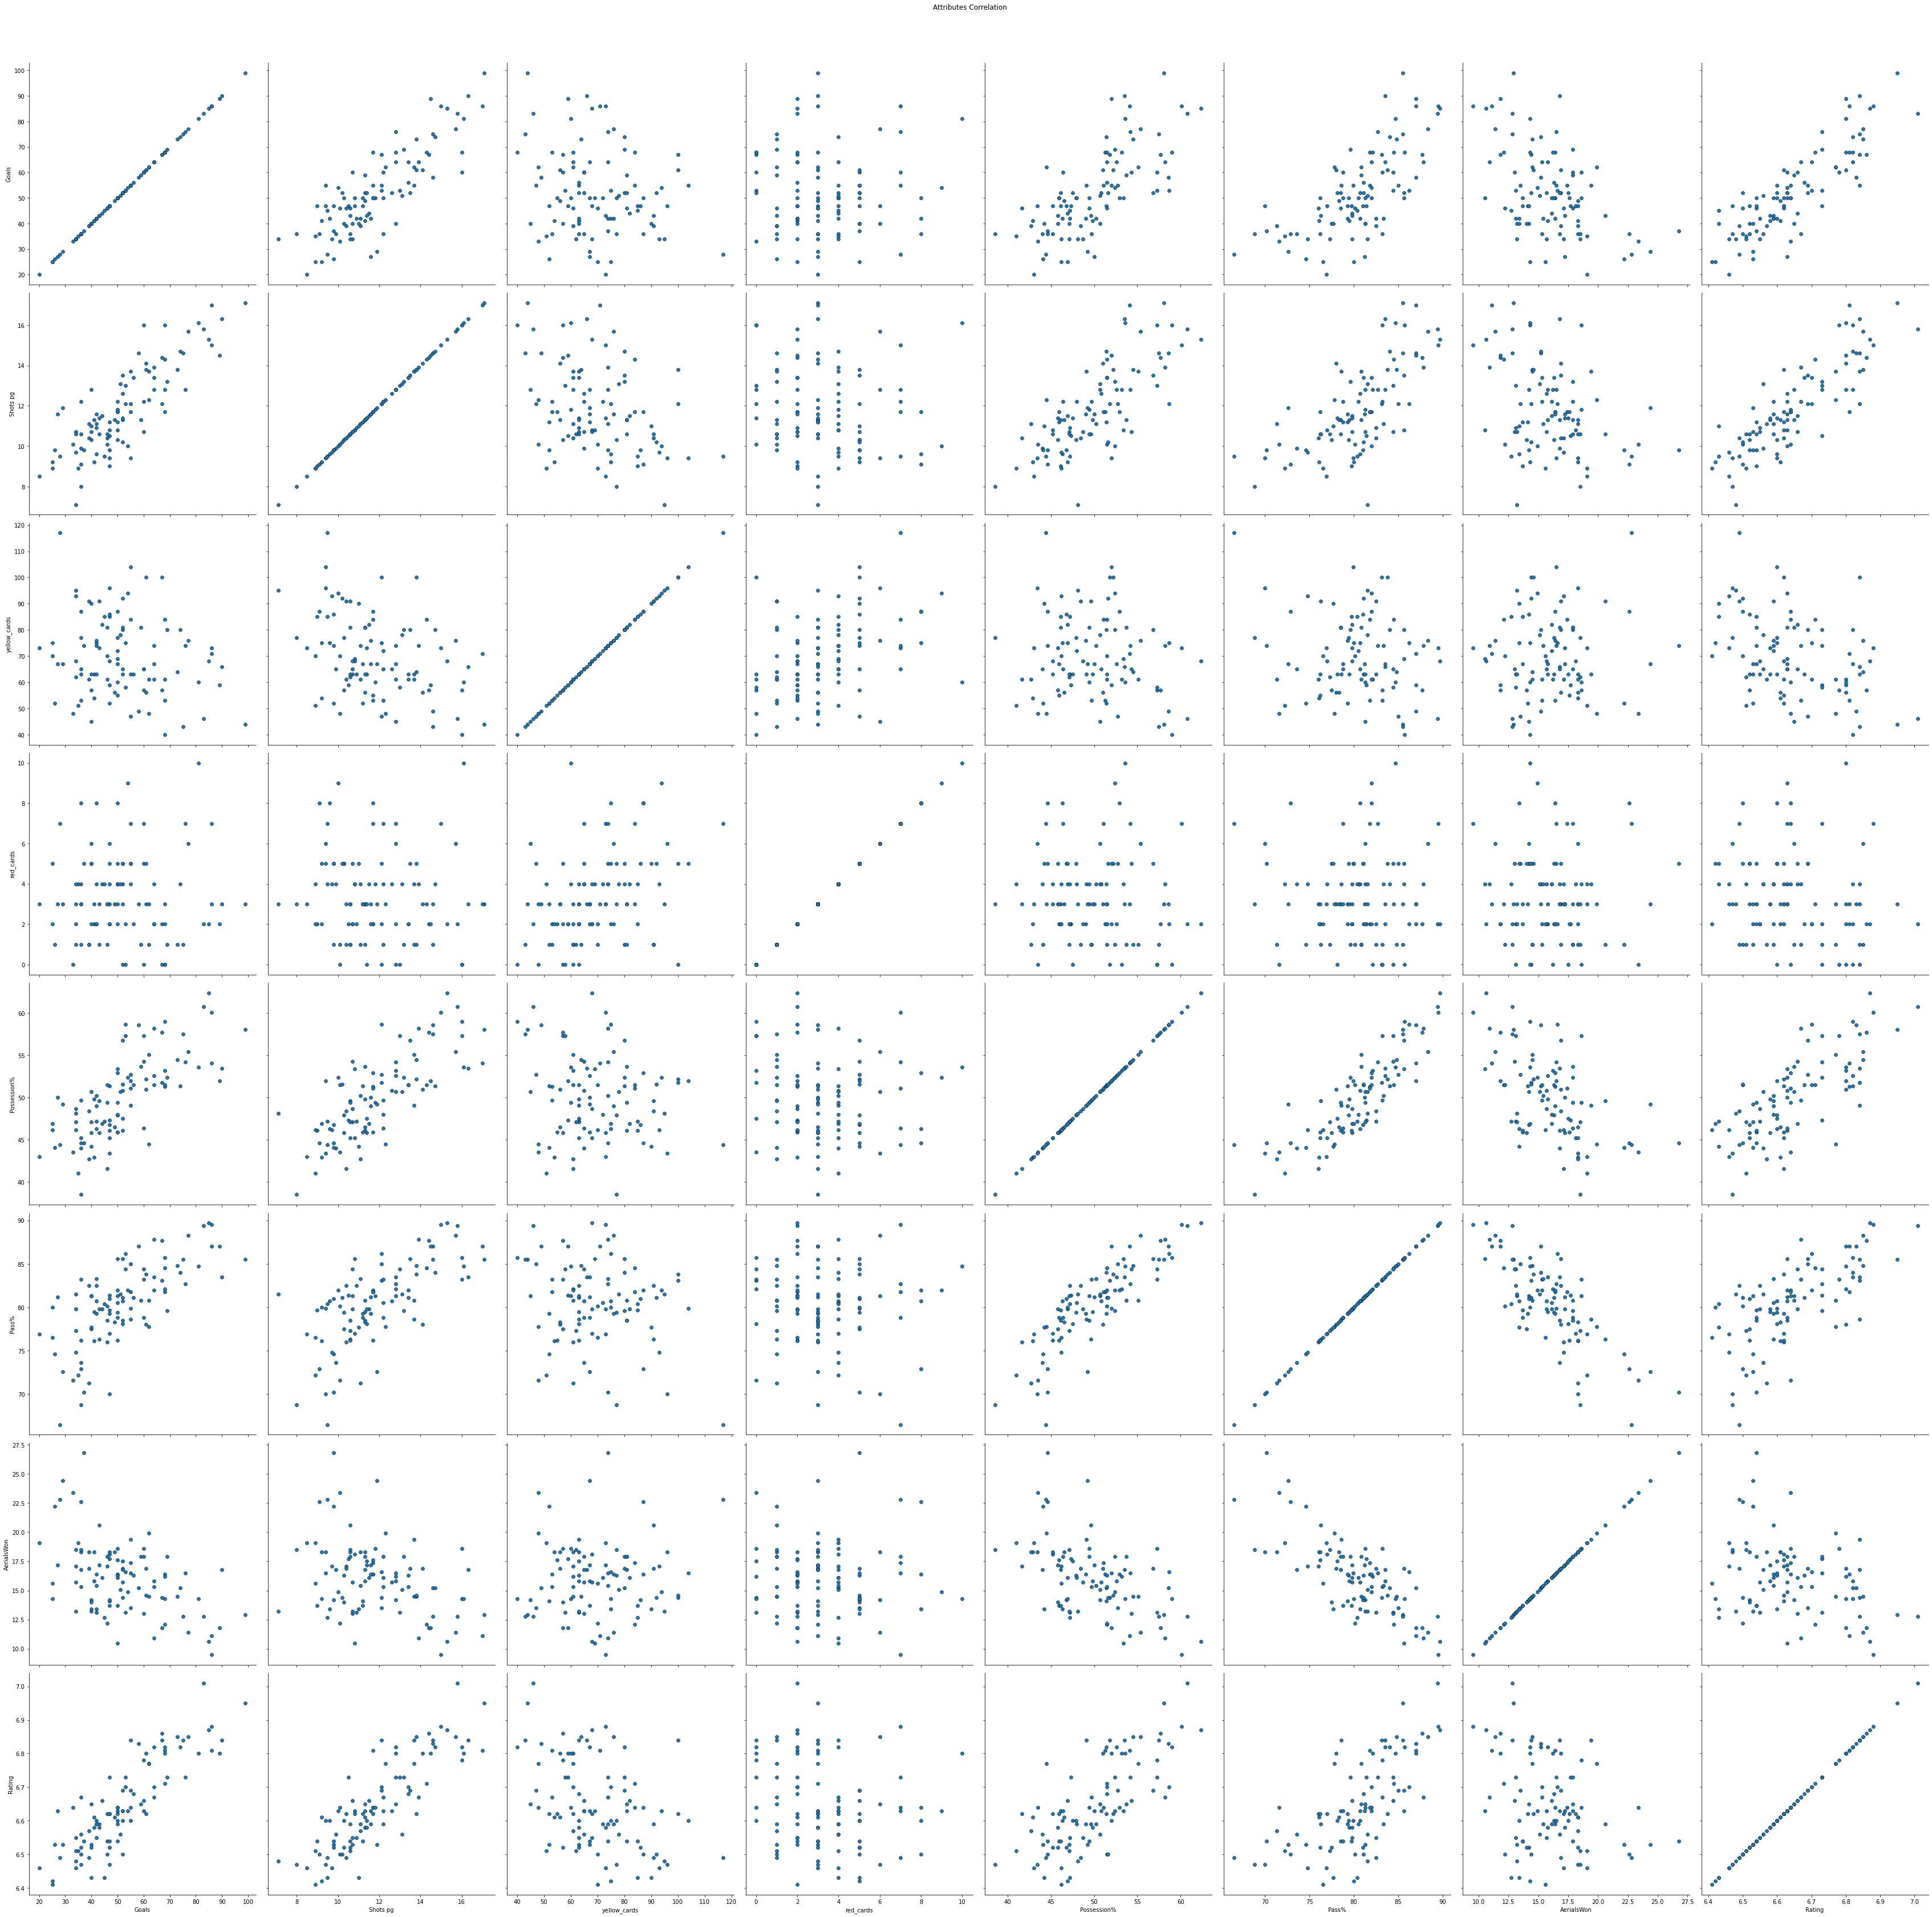

In [40]:
g = sns.PairGrid(df, vars=numeric_cols,palette="Reds",height=6)
g.map(sns.scatterplot, edgecolor="black")
g.fig.suptitle("Attributes Correlation")
g.fig.subplots_adjust(top=0.95)

The plot can show us a preview of the correlation between attributes.

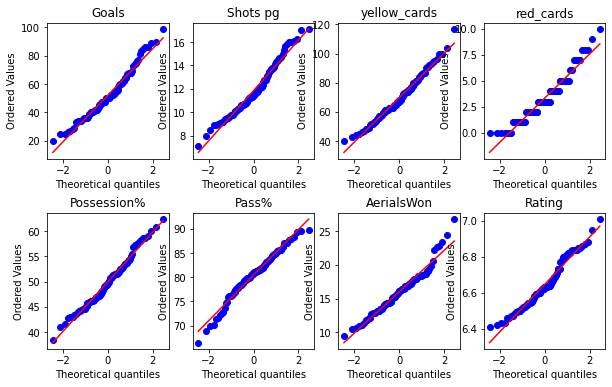

In [41]:
fig = plt.subplots(figsize=(10, 6))

for i,value in zip(range(241,249,1),numeric_cols):
    ax = plt.subplot(i)
    stats.probplot(df[value],plot=plt)
    ax.set_title(value)

plt.subplots_adjust(hspace=0.4)
plt.show()

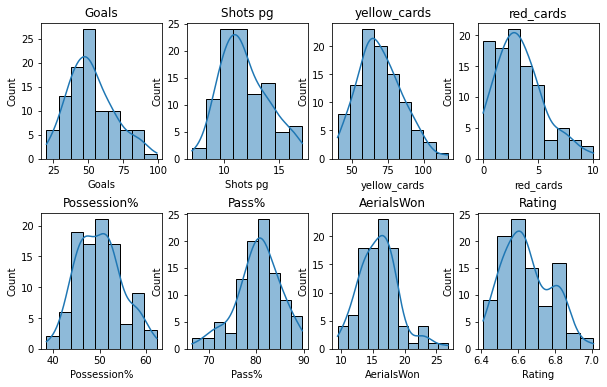

In [42]:
fig = plt.subplots(figsize=(10, 6))

for i,value in zip(range(241,249,1),numeric_cols):
    ax = plt.subplot(i)
    sns.histplot(df[value], kde=True)
    ax.set_title(value)
    
plt.subplots_adjust(hspace=0.4)
plt.show()

The plots shows that the data doesn't have a gaussian distribution and are assymetrical (skew). 

<h3>Exercise 1</h3>

**Select a sports-themed dataset you like and standardize the categorical attributes with dummies variables. Standardize the numeric attributes with StandardScaler.**

In [43]:
df_copy = df.copy()

<h4>Normalize Categorical Attributes</h4>

In [44]:
#the categorical columns can be transformed to dummies that are binary (0,1) 
categorical_dummies = pd.get_dummies(df_copy[object_cols])
categorical_dummies.head()

,Team_AC Milan,Team_Angers,Team_Arminia Bielefeld,Team_Arsenal,Team_Aston Villa,Team_Atalanta,Team_Athletic Bilbao,Team_Atletico Madrid,Team_Augsburg,Team_Barcelona,...,Team_Werder Bremen,Team_West Bromwich Albion,Team_West Ham,Team_Wolfsburg,Team_Wolverhampton Wanderers,Tournament_Bundesliga,Tournament_LaLiga,Tournament_Ligue 1,Tournament_Premier League,Tournament_Serie A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
#the categorical values have a 103 columns that are the teams + tournaments
categorical_dummies.shape

(98, 103)

<h4>Normalize Numerical Attributes</h4>

In [46]:
std_scaler = StandardScaler()
df_numeric_scaled = pd.DataFrame(std_scaler.fit_transform(df_copy[numeric_cols]), columns=numeric_cols)
df_numeric_scaled

,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,1.883458,1.846420,-1.573988,-0.625279,2.220752,1.919806,-1.046656,2.767713
1,2.861359,2.454260,-1.706791,-0.157513,1.665774,1.084005,-1.014010,2.311343
2,2.066814,1.472365,0.218854,1.713550,2.076869,1.941237,-2.123959,1.778911
3,2.005696,1.612636,-0.113154,-0.625279,2.549628,1.984098,-1.764858,1.702850
4,0.905557,1.191824,-0.843571,-0.625279,1.583555,1.555482,-1.373111,1.626788
...,...,...,...,...,...,...,...,...
93,-1.967028,-1.566833,0.218854,-0.157513,-1.437994,-0.759044,1.010013,-1.415678
94,-0.439058,-1.099264,1.015673,0.310253,-0.574694,-0.008966,-1.079302,-1.643863
95,-0.744652,-0.397911,1.347681,0.778019,-1.191337,-0.587598,-0.850783,-1.643863
96,-1.661434,-1.239535,0.351657,0.778019,-0.636358,-0.094689,-0.556973,-1.719925


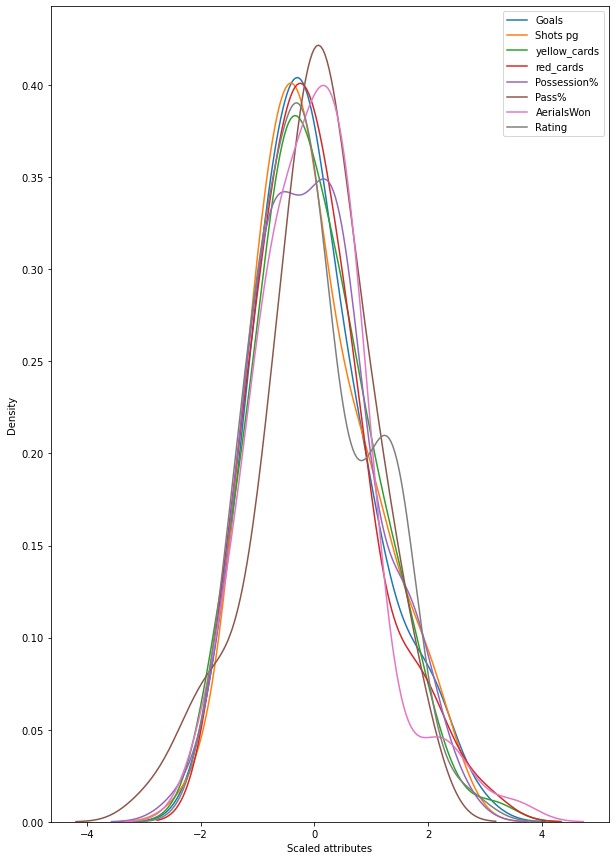

In [47]:
fig = plt.subplots(figsize=(10,15))
for col in numeric_cols:
    sns.kdeplot(df_numeric_scaled[col])
plt.xlabel('Scaled attributes')
plt.legend(labels=numeric_cols)

<h4>Normalized DataFrame</h4>

In [89]:
df_normalized_data = pd.concat([df_numeric_scaled,categorical_dummies],axis=1)
df_normalized_data

,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating,Team_AC Milan,Team_Angers,...,Team_Werder Bremen,Team_West Bromwich Albion,Team_West Ham,Team_Wolfsburg,Team_Wolverhampton Wanderers,Tournament_Bundesliga,Tournament_LaLiga,Tournament_Ligue 1,Tournament_Premier League,Tournament_Serie A
0,1.883458,1.846420,-1.573988,-0.625279,2.220752,1.919806,-1.046656,2.767713,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2.861359,2.454260,-1.706791,-0.157513,1.665774,1.084005,-1.014010,2.311343,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2.066814,1.472365,0.218854,1.713550,2.076869,1.941237,-2.123959,1.778911,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2.005696,1.612636,-0.113154,-0.625279,2.549628,1.984098,-1.764858,1.702850,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.905557,1.191824,-0.843571,-0.625279,1.583555,1.555482,-1.373111,1.626788,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,-1.967028,-1.566833,0.218854,-0.157513,-1.437994,-0.759044,1.010013,-1.415678,0,0,...,0,0,0,0,0,0,0,0,1,0
94,-0.439058,-1.099264,1.015673,0.310253,-0.574694,-0.008966,-1.079302,-1.643863,0,0,...,0,0,0,0,0,0,0,0,0,1
95,-0.744652,-0.397911,1.347681,0.778019,-1.191337,-0.587598,-0.850783,-1.643863,0,0,...,0,0,0,0,0,0,0,0,0,1
96,-1.661434,-1.239535,0.351657,0.778019,-0.636358,-0.094689,-0.556973,-1.719925,0,0,...,0,0,0,0,0,0,0,1,0,0


In [92]:
df_normalized_data.shape

(98, 111)

In [93]:
df_normalized_data.describe()

,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating,Team_AC Milan,Team_Angers,...,Team_Werder Bremen,Team_West Bromwich Albion,Team_West Ham,Team_Wolfsburg,Team_Wolverhampton Wanderers,Tournament_Bundesliga,Tournament_LaLiga,Tournament_Ligue 1,Tournament_Premier League,Tournament_Serie A
count,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,-3.172066e-17,-6.525392e-16,3.923661e-16,1.212182e-16,1.561110e-15,-4.055713e-16,-2.126983e-16,3.453020e-15,0.010204,0.010204,...,0.010204,0.010204,0.010204,0.010204,0.010204,0.183673,0.204082,0.204082,0.204082,0.204082
std,1.005141e+00,1.005141e+00,1.005141e+00,1.005141e+00,1.005141e+00,1.005141e+00,1.005141e+00,1.005141e+00,0.101015,0.101015,...,0.101015,0.101015,0.101015,0.101015,0.101015,0.389209,0.405101,0.405101,0.405101,0.405101
min,-1.967028e+00,-2.221430e+00,-1.972397e+00,-1.560810e+00,-2.362958e+00,-2.987847e+00,-2.123959e+00,-1.795986e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.293722e-01,-7.135198e-01,-6.443662e-01,-6.252787e-01,-7.751029e-01,-5.179474e-01,-6.467481e-01,-8.071849e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.334636e-01,-1.875047e-01,-1.463545e-01,-1.575130e-01,-5.054791e-02,7.675725e-02,3.064683e-02,-1.226300e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.846827e-01,7.008763e-01,6.836651e-01,6.610771e-01,5.866494e-01,6.446734e-01,6.019438e-01,6.379865e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.861359e+00,2.454260e+00,3.140523e+00,3.116847e+00,2.549628e+00,1.984098e+00,3.523720e+00,2.767713e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The plot show the similar values of the attributes after scale them.

<h2>Level 2</h2>

<h3>Exercise 2</h3>

**Continue with the sports-themed dataset and apply principal component analysis.**

In [94]:
pca = PCA()
pca.fit(df_normalized_data)

PCA()

In [152]:
pca_components = pd.DataFrame(data = pca.components_, columns=df_normalized_data.columns, 
             )
pca_components

,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating,Team_AC Milan,Team_Angers,...,Team_Werder Bremen,Team_West Bromwich Albion,Team_West Ham,Team_Wolfsburg,Team_Wolverhampton Wanderers,Tournament_Bundesliga,Tournament_LaLiga,Tournament_Ligue 1,Tournament_Premier League,Tournament_Serie A
0,4.166055e-01,4.209056e-01,-1.701265e-01,-6.253490e-02,4.162856e-01,4.170847e-01,-2.994792e-01,4.177500e-01,0.004644,-0.001536,...,-0.004452,-0.006842,-0.000182,0.002477,0.000670,3.002029e-03,-4.438535e-02,2.864915e-03,1.874236e-02,1.977604e-02
1,-8.230378e-02,8.629180e-02,-6.119891e-01,-6.016518e-01,-1.051073e-01,-1.856284e-01,3.129395e-01,1.597698e-01,-0.005069,0.001083,...,0.006001,0.009298,0.012701,0.008028,0.009783,1.344855e-01,-7.795289e-02,-1.064706e-01,1.607059e-01,-1.107679e-01
2,2.480713e-01,2.739384e-01,-3.452882e-02,5.398740e-01,-4.950918e-02,-2.858448e-01,6.004128e-01,3.144345e-01,0.009290,-0.017485,...,-0.000472,0.005782,0.017881,0.012476,-0.011762,-1.996815e-02,2.709693e-02,6.163932e-02,2.877612e-02,-9.754421e-02
3,1.602195e-01,9.935756e-02,6.425382e-01,-5.034567e-01,1.844931e-01,-9.789801e-02,3.324093e-01,1.018250e-01,0.011917,-0.013543,...,-0.005224,-0.020508,-0.007661,0.000263,-0.008704,2.560702e-02,2.026214e-01,-2.125962e-01,-1.331826e-01,1.175503e-01
4,-4.261315e-01,-1.985210e-01,-4.750733e-02,7.463625e-02,6.112882e-01,2.309471e-01,2.626434e-01,7.839163e-03,-0.027060,-0.002819,...,-0.004321,-0.010669,-0.017700,-0.011242,0.014710,-7.163505e-02,2.738985e-01,7.423853e-02,1.098763e-01,-3.863782e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,-8.273818e-18,-4.273907e-17,7.314170e-18,1.196012e-18,-3.579989e-17,6.846482e-20,-3.365201e-18,8.840616e-17,-0.012756,0.079292,...,-0.041058,-0.002780,0.048369,0.115115,-0.016649,-6.938894e-17,-6.938894e-17,-1.457168e-16,-1.249001e-16,-9.020562e-17
94,-2.348653e-17,4.025266e-17,-3.308822e-17,3.191720e-17,-2.454659e-17,9.384259e-18,1.017572e-17,-2.925965e-17,0.070827,-0.050402,...,-0.096429,-0.049863,-0.084374,0.164402,-0.198094,-4.163336e-17,-8.326673e-17,-5.204170e-18,-5.551115e-17,2.775558e-17
95,2.081668e-16,1.708544e-16,-5.963470e-17,1.296316e-17,-1.405502e-16,5.972654e-17,8.535235e-19,-1.186813e-16,0.292342,0.463525,...,-0.043720,-0.012101,-0.015093,0.073630,-0.002918,-1.526557e-16,6.938894e-18,1.110223e-16,-1.075529e-16,-0.000000e+00
96,-1.387779e-16,2.220446e-16,1.110223e-16,5.551115e-17,4.718448e-16,-7.632783e-16,-3.608225e-16,6.383782e-16,-0.029410,-0.010529,...,0.035930,-0.009310,0.011786,-0.137251,0.019312,-2.792905e-16,3.816392e-17,2.437286e-16,1.110223e-16,1.231654e-16


<AxesSubplot:>

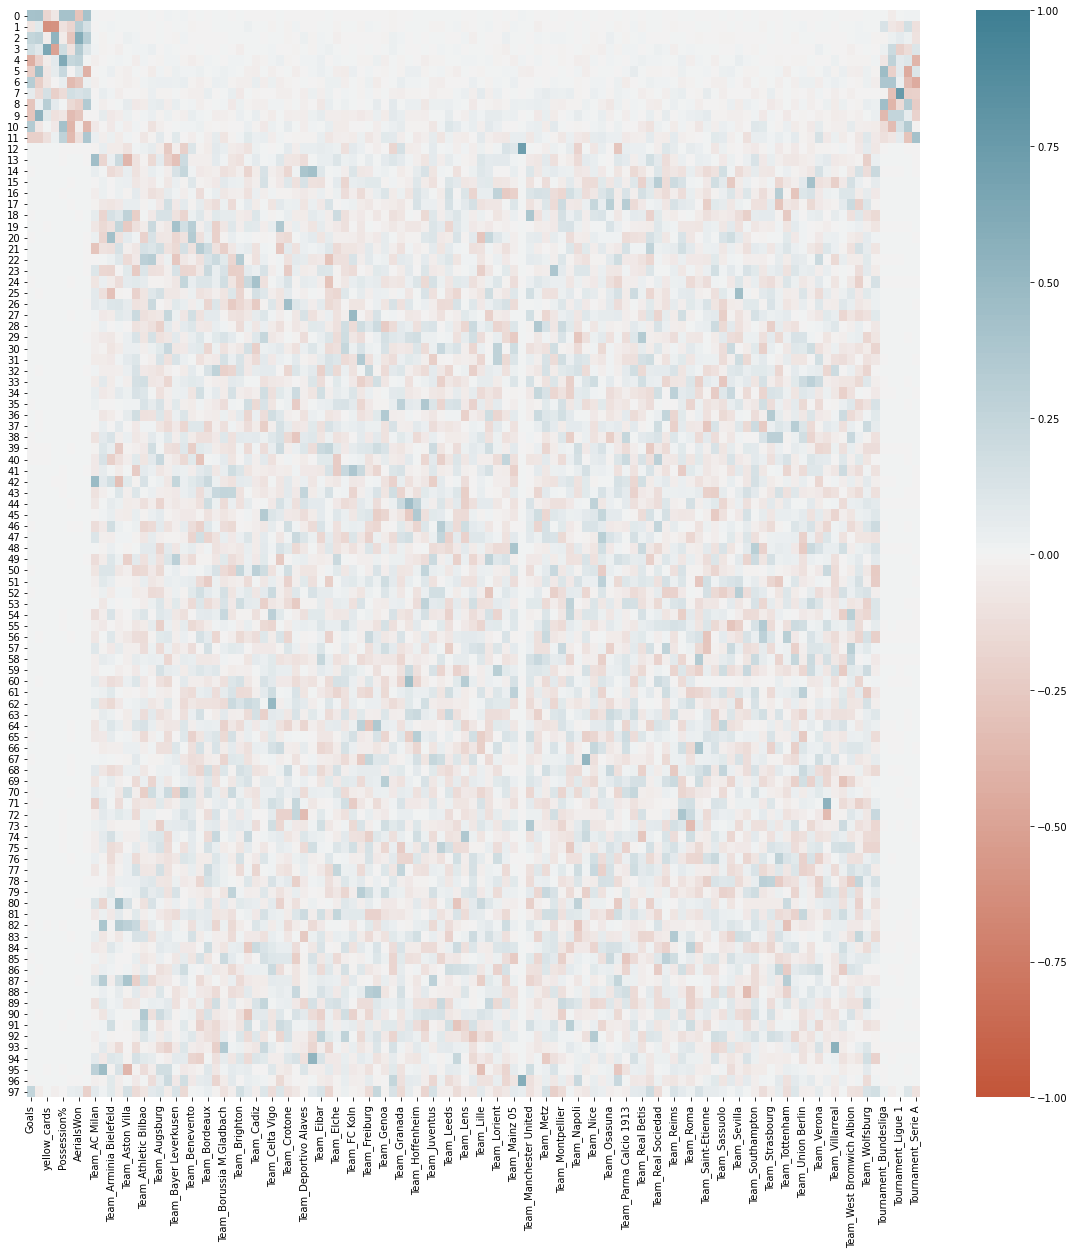

In [100]:
plt.figure(figsize=(20,20))
sns.heatmap(pca_components,cmap=sns.diverging_palette(20, 220, n=200),vmin=-1, vmax=1,)

The correlation matrix doesn't show that an attribute have more correlation with the components.

In [101]:
#Percentage of variance explained by each of the selected components.
# we can see that PC1 has more spread data than the rest.
pca.explained_variance_ratio_

array([4.65583793e-01, 1.55425304e-01, 8.71247613e-02, 6.86486193e-02,
       3.70987421e-02, 2.54097066e-02, 2.19268033e-02, 1.76474652e-02,
       1.12381881e-02, 9.94612394e-03, 7.22385085e-03, 4.12658651e-03,
       1.04235359e-03, 1.04235359e-03, 1.04235359e-03, 1.04235359e-03,
       1.04235359e-03, 1.04235359e-03, 1.04235359e-03, 1.04235359e-03,
       1.04235359e-03, 1.04235359e-03, 1.04235359e-03, 1.04235359e-03,
       1.04235359e-03, 1.04235359e-03, 1.04235359e-03, 1.04235359e-03,
       1.04235359e-03, 1.04235359e-03, 1.04235359e-03, 1.04235359e-03,
       1.04235359e-03, 1.04235359e-03, 1.04235359e-03, 1.04235359e-03,
       1.04235359e-03, 1.04235359e-03, 1.04235359e-03, 1.04235359e-03,
       1.04235359e-03, 1.04235359e-03, 1.04235359e-03, 1.04235359e-03,
       1.04235359e-03, 1.04235359e-03, 1.04235359e-03, 1.04235359e-03,
       1.04235359e-03, 1.04235359e-03, 1.04235359e-03, 1.04235359e-03,
       1.04235359e-03, 1.04235359e-03, 1.04235359e-03, 1.04235359e-03,
      

In [102]:
#number of components
pca.n_components_

98

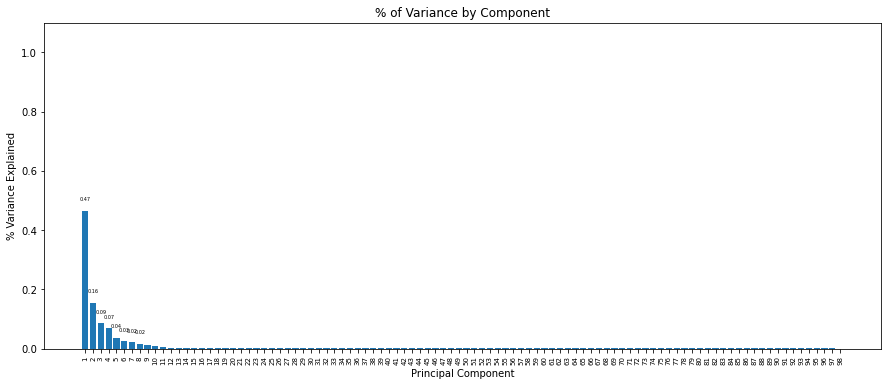

In [124]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_numeric_scaled.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center',
        fontsize=5
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('% of Variance by Component')
ax.set_xlabel('Principal Component')
ax.set_ylabel('% Variance Explained')
plt.xticks(rotation = 90)
ax.tick_params(axis='x', labelsize=7)
plt.show()

In [125]:
#The pca.explained_variance_ratio_ returns a vector of the variance explained 
#by each dimension, with pca.explained_variance_ratio_.cumsum()
#we look for the accumulative
acumulative_variance = pca.explained_variance_ratio_.cumsum()
acumulative_variance

array([0.46558379, 0.6210091 , 0.70813386, 0.77678248, 0.81388122,
       0.83929093, 0.86121773, 0.8788652 , 0.89010338, 0.90004951,
       0.90727336, 0.91139994, 0.9124423 , 0.91348465, 0.91452701,
       0.91556936, 0.91661171, 0.91765407, 0.91869642, 0.91973877,
       0.92078113, 0.92182348, 0.92286583, 0.92390819, 0.92495054,
       0.92599289, 0.92703525, 0.9280776 , 0.92911996, 0.93016231,
       0.93120466, 0.93224702, 0.93328937, 0.93433172, 0.93537408,
       0.93641643, 0.93745878, 0.93850114, 0.93954349, 0.94058585,
       0.9416282 , 0.94267055, 0.94371291, 0.94475526, 0.94579761,
       0.94683997, 0.94788232, 0.94892467, 0.94996703, 0.95100938,
       0.95205173, 0.95309409, 0.95413644, 0.9551788 , 0.95622115,
       0.9572635 , 0.95830586, 0.95934821, 0.96039056, 0.96143292,
       0.96247527, 0.96351762, 0.96455998, 0.96560233, 0.96664469,
       0.96768704, 0.96872939, 0.96977175, 0.9708141 , 0.97185645,
       0.97289881, 0.97394116, 0.97498351, 0.97602587, 0.97706

In [213]:
for i,value in enumerate(acumulative_variance):
    variance_port = round(value * 100,2)
    pc_n = i+1
    print("PC{}: {}".format(pc_n,variance_port))

PC1: 46.56
PC2: 62.1
PC3: 70.81
PC4: 77.68
PC5: 81.39
PC6: 83.93
PC7: 86.12
PC8: 87.89
PC9: 89.01
PC10: 90.0
PC11: 90.73
PC12: 91.14
PC13: 91.24
PC14: 91.35
PC15: 91.45
PC16: 91.56
PC17: 91.66
PC18: 91.77
PC19: 91.87
PC20: 91.97
PC21: 92.08
PC22: 92.18
PC23: 92.29
PC24: 92.39
PC25: 92.5
PC26: 92.6
PC27: 92.7
PC28: 92.81
PC29: 92.91
PC30: 93.02
PC31: 93.12
PC32: 93.22
PC33: 93.33
PC34: 93.43
PC35: 93.54
PC36: 93.64
PC37: 93.75
PC38: 93.85
PC39: 93.95
PC40: 94.06
PC41: 94.16
PC42: 94.27
PC43: 94.37
PC44: 94.48
PC45: 94.58
PC46: 94.68
PC47: 94.79
PC48: 94.89
PC49: 95.0
PC50: 95.1
PC51: 95.21
PC52: 95.31
PC53: 95.41
PC54: 95.52
PC55: 95.62
PC56: 95.73
PC57: 95.83
PC58: 95.93
PC59: 96.04
PC60: 96.14
PC61: 96.25
PC62: 96.35
PC63: 96.46
PC64: 96.56
PC65: 96.66
PC66: 96.77
PC67: 96.87
PC68: 96.98
PC69: 97.08
PC70: 97.19
PC71: 97.29
PC72: 97.39
PC73: 97.5
PC74: 97.6
PC75: 97.71
PC76: 97.81
PC77: 97.92
PC78: 98.02
PC79: 98.12
PC80: 98.23
PC81: 98.33
PC82: 98.44
PC83: 98.54
PC84: 98.64
PC85: 98.7

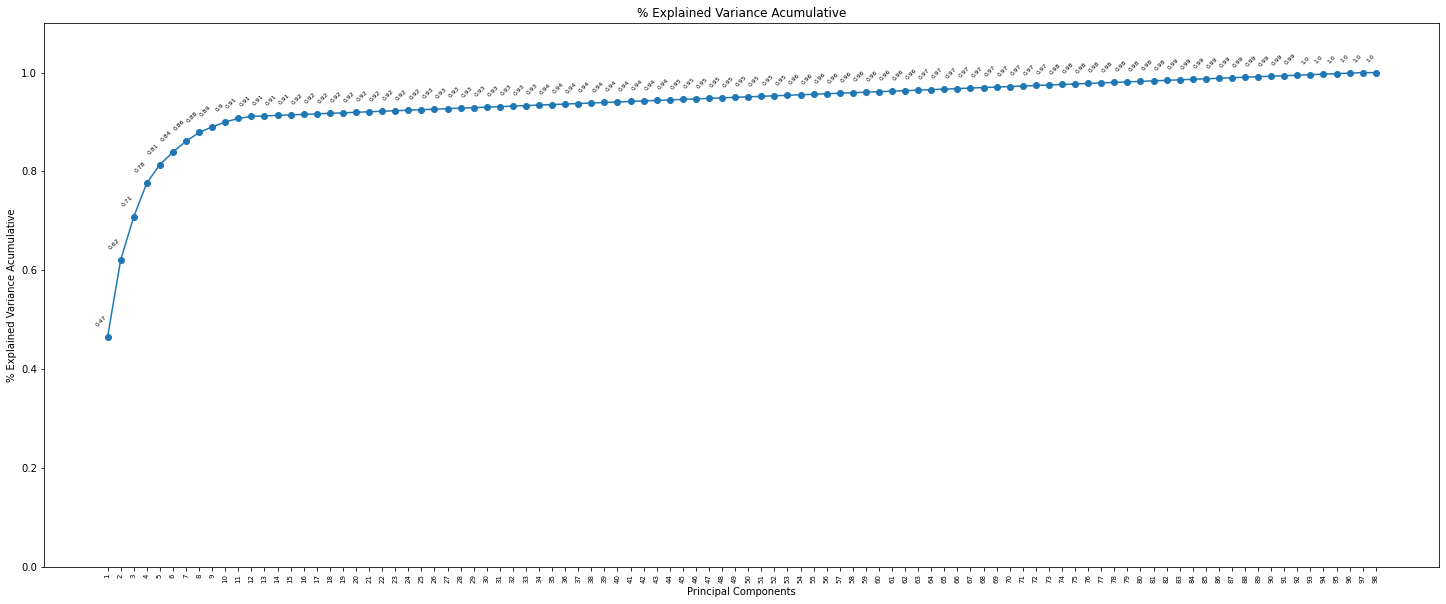

In [187]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 10))

ax.plot(
        np.arange(pca.n_components_) + 1,
        acumulative_variance,
        marker='o')

for x, y in zip(np.arange(pca.n_components_) + 1,acumulative_variance):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='right',
        rotation = 45,
        fontsize=6)

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('% Explained Variance Acumulative')
ax.set_xlabel('Principal Components')
ax.set_ylabel('% Explained Variance Acumulative')
plt.xticks(rotation = 90)
ax.tick_params(axis='x', labelsize=7)
plt.show()

As we can see in the above plot, with PC1 we have a 46.55% of variance with PC4 77.67%, with PC29 92.91%, PC68 96.97% , PC88 99.06% depending of what we look and the cost we need to choose the number of PC.

In [147]:
proyecction_pca = pd.DataFrame(data=pca.transform(X=df_normalized_data), 
                              )
proyecction_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,5.093767,1.039067,0.304955,-0.191215,0.529950,-0.716931,-0.165084,-0.156004,0.235655,-0.079104,...,5.210532e-17,9.308429e-17,-1.601635e-16,6.225312e-17,4.119526e-17,6.170161e-17,-2.414452e-17,5.674059e-16,0.596197,1.196959e-15
1,4.954243,0.934738,1.074121,-0.192386,-0.709838,0.400761,1.030063,-0.254238,0.019343,-0.218200,...,-4.437172e-02,-8.766304e-03,1.794595e-02,8.031631e-02,3.029170e-02,1.057235e-01,6.041773e-02,-5.975030e-02,0.177907,1.041875e-14
2,4.402619,-2.286105,0.527525,-0.800633,0.196761,-0.130382,0.462194,0.396922,0.286790,0.083325,...,1.220836e-01,-7.402921e-02,-1.527743e-01,-3.655449e-02,4.272521e-03,1.051491e-02,5.796958e-02,-2.626458e-01,0.224554,9.735268e-15
3,4.667644,-0.576061,-0.592326,0.801881,0.640920,-0.269621,0.708986,-0.317220,-0.358906,0.265210,...,-8.582950e-03,7.986629e-02,9.403925e-02,-3.713314e-02,5.699043e-02,-1.916582e-01,-3.082642e-02,1.773751e-01,0.208291,1.035283e-14
4,3.423650,0.222077,-0.573429,0.089876,0.640714,-0.305006,0.483672,-0.327588,-0.324747,0.412763,...,7.143677e-02,4.219834e-02,-1.884416e-02,6.113761e-02,1.121846e-01,-3.767586e-03,-6.517788e-02,-7.041244e-02,-0.117701,-1.415534e-15


In [151]:
df_normalized_data.columns

Index(['Goals', 'Shots pg', 'yellow_cards', 'red_cards', 'Possession%',
       'Pass%', 'AerialsWon', 'Rating', 'Team_AC Milan', 'Team_Angers',
       ...
       'Team_Werder Bremen', 'Team_West Bromwich Albion', 'Team_West Ham',
       'Team_Wolfsburg', 'Team_Wolverhampton Wanderers',
       'Tournament_Bundesliga', 'Tournament_LaLiga', 'Tournament_Ligue 1',
       'Tournament_Premier League', 'Tournament_Serie A'],
      dtype='object', length=111)

In [158]:
reconstruction_df = pca.inverse_transform(X=proyecction_pca)
reconstruction_df= pd.DataFrame(
                    reconstruction_df,
                    )
reconstruction_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
count,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,...,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01
mean,-2.764229e-16,-5.641746e-16,2.911857e-16,1.280155e-16,1.289218e-15,-4.916702e-16,8.015131e-17,3.409971e-15,1.020408e-02,1.020408e-02,...,1.020408e-02,1.020408e-02,1.020408e-02,1.020408e-02,1.020408e-02,1.836735e-01,2.040816e-01,2.040816e-01,2.040816e-01,2.040816e-01
std,1.005141e+00,1.005141e+00,1.005141e+00,1.005141e+00,1.005141e+00,1.005141e+00,1.005141e+00,1.005141e+00,1.010153e-01,1.010153e-01,...,1.010153e-01,1.010153e-01,1.010153e-01,1.010153e-01,1.010153e-01,3.892085e-01,4.051011e-01,4.051011e-01,4.051011e-01,4.051011e-01
min,-1.967028e+00,-2.221430e+00,-1.972397e+00,-1.560810e+00,-2.362958e+00,-2.987847e+00,-2.123959e+00,-1.795986e+00,-4.544976e-16,-5.741935e-16,...,-2.237793e-16,-2.931683e-16,-3.157197e-16,-3.330669e-16,-3.382711e-16,-1.332268e-15,-6.938894e-16,-1.887379e-15,-1.609823e-15,-1.998401e-15
25%,-7.293722e-01,-7.135198e-01,-6.443662e-01,-6.252787e-01,-7.751029e-01,-5.179474e-01,-6.467481e-01,-8.071849e-01,-1.301043e-16,-2.250804e-16,...,-7.546047e-17,-8.977194e-17,-1.001803e-16,-4.466913e-17,-7.112366e-17,-3.538836e-16,-2.151057e-16,-3.330669e-16,-2.983724e-16,-4.302114e-16
50%,-1.334636e-01,-1.875047e-01,-1.463545e-01,-1.575130e-01,-5.054791e-02,7.675725e-02,3.064683e-02,-1.226300e-01,-2.515349e-17,-8.673617e-18,...,-5.204170e-18,-1.561251e-17,0.000000e+00,1.301043e-17,-5.204170e-18,4.163336e-17,1.110223e-16,1.387779e-17,3.747003e-16,6.938894e-17
75%,5.846827e-01,7.008763e-01,6.836651e-01,6.610771e-01,5.866494e-01,6.446734e-01,6.019438e-01,6.379865e-01,8.283305e-17,2.020953e-16,...,6.071532e-17,7.068998e-17,9.714451e-17,6.028164e-17,1.053845e-16,6.591949e-16,5.759282e-16,6.591949e-16,1.096345e-15,1.054712e-15
max,2.861359e+00,2.454260e+00,3.140523e+00,3.116847e+00,2.549628e+00,1.984098e+00,3.523720e+00,2.767713e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [155]:
df_normalized_data.describe()

,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating,Team_AC Milan,Team_Angers,...,Team_Werder Bremen,Team_West Bromwich Albion,Team_West Ham,Team_Wolfsburg,Team_Wolverhampton Wanderers,Tournament_Bundesliga,Tournament_LaLiga,Tournament_Ligue 1,Tournament_Premier League,Tournament_Serie A
count,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,-3.172066e-17,-6.525392e-16,3.923661e-16,1.212182e-16,1.561110e-15,-4.055713e-16,-2.126983e-16,3.453020e-15,0.010204,0.010204,...,0.010204,0.010204,0.010204,0.010204,0.010204,0.183673,0.204082,0.204082,0.204082,0.204082
std,1.005141e+00,1.005141e+00,1.005141e+00,1.005141e+00,1.005141e+00,1.005141e+00,1.005141e+00,1.005141e+00,0.101015,0.101015,...,0.101015,0.101015,0.101015,0.101015,0.101015,0.389209,0.405101,0.405101,0.405101,0.405101
min,-1.967028e+00,-2.221430e+00,-1.972397e+00,-1.560810e+00,-2.362958e+00,-2.987847e+00,-2.123959e+00,-1.795986e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.293722e-01,-7.135198e-01,-6.443662e-01,-6.252787e-01,-7.751029e-01,-5.179474e-01,-6.467481e-01,-8.071849e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.334636e-01,-1.875047e-01,-1.463545e-01,-1.575130e-01,-5.054791e-02,7.675725e-02,3.064683e-02,-1.226300e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.846827e-01,7.008763e-01,6.836651e-01,6.610771e-01,5.866494e-01,6.446734e-01,6.019438e-01,6.379865e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.861359e+00,2.454260e+00,3.140523e+00,3.116847e+00,2.549628e+00,1.984098e+00,3.523720e+00,2.767713e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The error is low but is important to remember that we used all the 8 attributes and the goal of PCA is reduce the number of of features used to represent data  in a low dimension.

<h3>Dimensionality Reduction</h3>

In [190]:
#We will perform the PCA with n_components of 2 (74%) y 4(%92) 
pca_8_components = PCA(n_components=8)
pca_26_components = PCA(n_components=26)
pca_49_components = PCA(n_components=49)

pca_8_comp = pca_8_components.fit_transform(df_normalized_data)
pca_26_comp = pca_26_components.fit_transform(df_normalized_data)
pca_49_comp = pca_49_components.fit_transform(df_normalized_data)

In [191]:
pca_8_comp_df = pd.DataFrame(data=pca_8_comp)
pca_8_comp_df.head()

,0,1,2,3,4,5,6,7
0,5.093767,1.039067,0.304955,-0.191215,0.529950,-0.716931,-0.165084,-0.156004
1,4.954243,0.934738,1.074121,-0.192386,-0.709838,0.400761,1.030063,-0.254238
2,4.402619,-2.286105,0.527525,-0.800633,0.196761,-0.130382,0.462194,0.396922
3,4.667644,-0.576061,-0.592326,0.801881,0.640920,-0.269621,0.708986,-0.317220
4,3.423650,0.222077,-0.573429,0.089876,0.640714,-0.305006,0.483672,-0.327588


In [230]:
fig = px.scatter_matrix(
    pca_8_comp,
    color=df.Team,
    dimensions=range(8),
    #labels=labels,
    title=' 8 Principal Components Explained Variance',
)
fig.update_traces(diagonal_visible=False)
fig.show()

<AxesSubplot:>

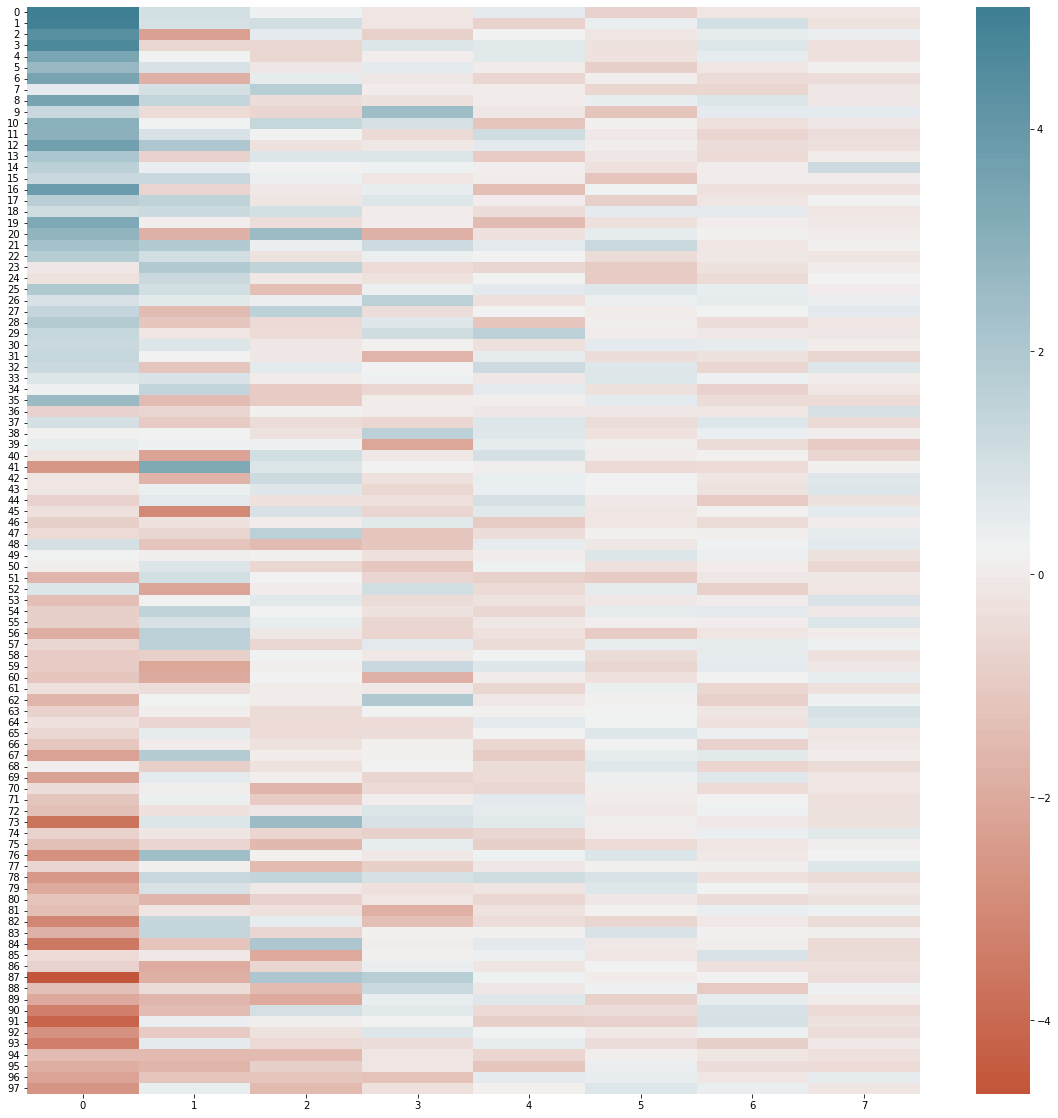

In [192]:
plt.figure(figsize=(20,20))
sns.heatmap(pca_8_comp_df,cmap=sns.diverging_palette(20, 220, n=200))

In [165]:
pca_26_comp_df = pd.DataFrame(data=pca_26_comp)
pca_26_comp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,5.093767,1.039067,0.304955,-0.191215,0.529950,-0.716931,-0.165084,-0.156004,0.235655,-0.079104,...,0.000000,-0.000000,-2.015505e-75,-3.061779e-90,-4.784755e-105,-1.001715e-149,-1.366305e-179,-1.747090e-194,1.718720e-209,-1.470672e-224
1,4.954243,0.934738,1.074121,-0.192386,-0.709838,0.400761,1.030063,-0.254238,0.019343,-0.218200,...,-0.038613,0.069096,-1.859767e-01,1.679812e-01,-9.972091e-02,1.551103e-01,-6.260568e-02,-1.711817e-01,2.497292e-01,-2.402295e-02
2,4.402619,-2.286105,0.527525,-0.800633,0.196761,-0.130382,0.462194,0.396922,0.286790,0.083325,...,-0.045402,-0.037047,-6.037689e-02,3.748457e-02,1.364108e-02,-5.157030e-02,1.826094e-01,-7.482335e-02,-1.744080e-01,1.454764e-01
3,4.667644,-0.576061,-0.592326,0.801881,0.640920,-0.269621,0.708986,-0.317220,-0.358906,0.265210,...,0.058626,0.164080,1.308249e-01,-6.325352e-02,-6.542389e-02,-9.321297e-02,2.063448e-02,-2.182836e-02,-2.540757e-02,-6.046414e-02
4,3.423650,0.222077,-0.573429,0.089876,0.640714,-0.305006,0.483672,-0.327588,-0.324747,0.412763,...,0.080620,0.017448,-1.962382e-01,-4.571198e-02,1.510313e-01,2.698780e-01,-1.640078e-01,1.131713e-01,-7.633712e-03,-1.664971e-01


In [231]:
fig = px.scatter_matrix(
    pca_26_comp,
    color=df.Team,
    dimensions=range(8),
    #labels=labels,
    title='26 Principal Components Explained Variance',
)
fig.update_traces(diagonal_visible=False)
fig.show()

<AxesSubplot:>

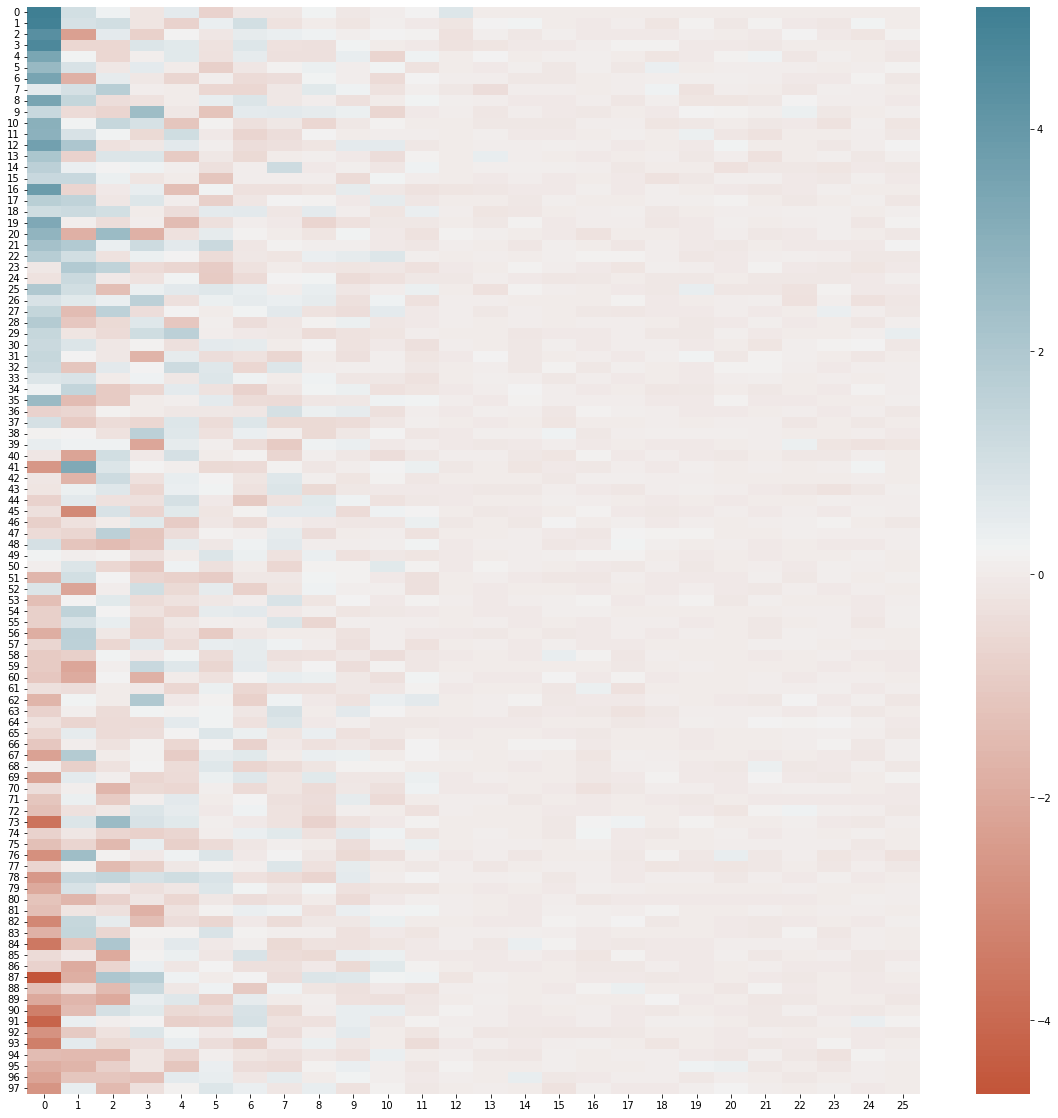

In [179]:
plt.figure(figsize=(20,20))
sns.heatmap(pca_26_comp_df,cmap=sns.diverging_palette(20, 220, n=200))

In [172]:
pca_49_comp_df = pd.DataFrame(data=pca_49_comp)
pca_49_comp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,5.093767,1.039067,0.304955,-0.191215,0.529950,-0.716931,-0.165084,-0.156004,0.235655,-0.079104,...,0.000000,0.000000,-0.000000,6.481203e-120,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000
1,4.954243,0.934738,1.074121,-0.192386,-0.709838,0.400761,1.030063,-0.254238,0.019343,-0.218200,...,0.099914,-0.150170,0.021670,3.620663e-02,0.031591,-0.034720,-0.050135,0.057020,-0.022892,0.022522
2,4.402619,-2.286105,0.527525,-0.800633,0.196761,-0.130382,0.462194,0.396922,0.286790,0.083325,...,-0.054722,0.113354,-0.103727,1.444937e-01,0.120193,0.005313,0.061547,-0.043587,0.077969,0.011514
3,4.667644,-0.576061,-0.592326,0.801881,0.640920,-0.269621,0.708986,-0.317220,-0.358906,0.265210,...,-0.118298,-0.027004,-0.030311,-6.897332e-02,-0.044133,-0.030562,-0.014007,-0.092595,-0.015562,0.077299
4,3.423650,0.222077,-0.573429,0.089876,0.640714,-0.305006,0.483672,-0.327588,-0.324747,0.412763,...,-0.240606,-0.118436,0.121375,-4.328421e-02,-0.032262,-0.079528,0.149045,-0.032733,0.078994,-0.065776


In [232]:
fig = px.scatter_matrix(
    pca_49_comp,
    color=df.Team,
    dimensions=range(8),
    #labels=labels,
    title='49 Principal Components Explained Variance',
)
fig.update_traces(diagonal_visible=False)
fig.show()

<AxesSubplot:>

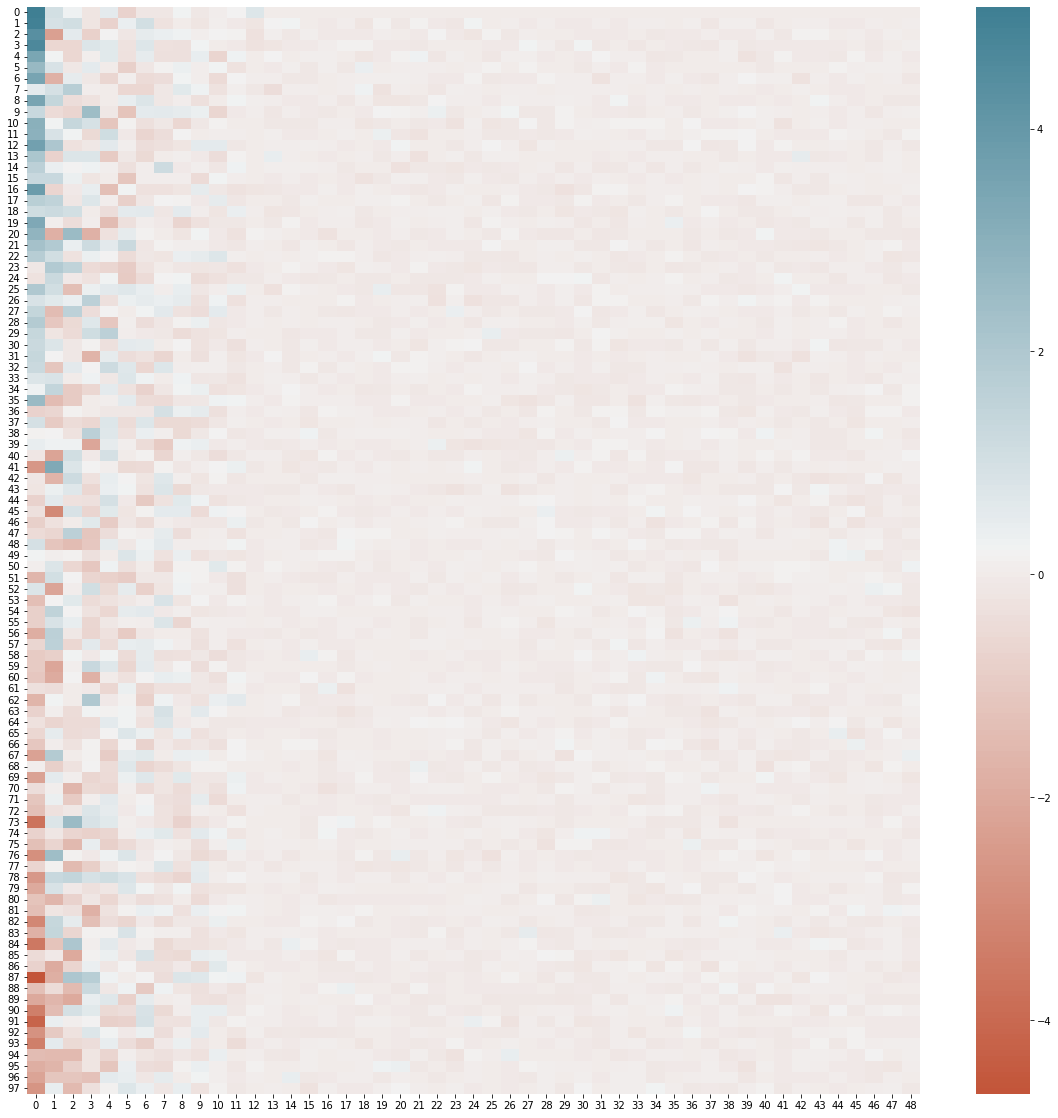

In [177]:
plt.figure(figsize=(20,20))
sns.heatmap(pca_49_comp_df,cmap=sns.diverging_palette(20, 220, n=200))

As we can see we have a more spread data in 49 components but maybe in other circunstance use 26 is better.

<h2>Level 3</h2>

<h3>Exercise 3</h3>

**Continue with the sports-themed dataset and normalize the data to account for outliers.**

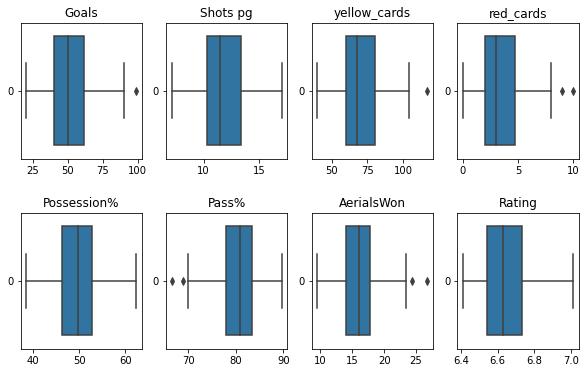

In [68]:
#We need to know the outliers
fig = plt.subplots(figsize=(10, 6))

for i,value in zip(range(241,249,1),numeric_cols):
    ax = plt.subplot(i)
    sns.boxplot(data=df_copy[value],orient="h")
    ax.set_title(value)
    
plt.subplots_adjust(hspace=0.4)
plt.show()

Goals, Yellow Cards, Red Cards, Pass%, Aerial Won have outliers

<h4>Skew reduction</h4>

In [69]:
#The data is not normal so have a skew
df_copy[numeric_cols].skew()

Goals           0.596399
Shots pg        0.490015
yellow_cards    0.461989
red_cards       0.728479
Possession%     0.303437
Pass%          -0.496936
AerialsWon      0.695362
Rating          0.431686
dtype: float64

In [70]:
#log transformation
df_log = pd.DataFrame(data=np.ma.log(df_copy[numeric_cols].values).filled(0), columns=numeric_cols)
df_log.skew()

Goals          -0.226148
Shots pg        0.072430
yellow_cards   -0.092690
red_cards      -0.267115
Possession%     0.071287
Pass%          -0.686828
AerialsWon      0.001531
Rating          0.393487
dtype: float64

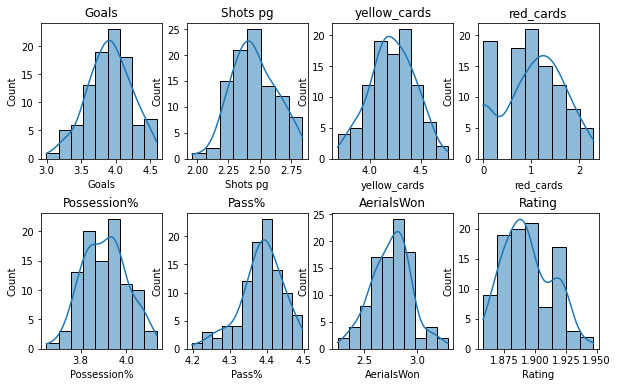

In [193]:
fig = plt.subplots(figsize=(10, 6))

for i,value in zip(range(241,249,1),numeric_cols):
    ax = plt.subplot(i)
    sns.histplot(df_log[value], kde=True)
    ax.set_title(value)
    
plt.subplots_adjust(hspace=0.4)
plt.show()



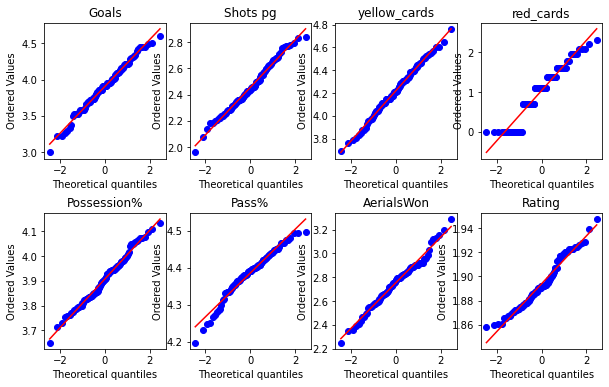

In [196]:
fig = plt.subplots(figsize=(10, 6))

for i,value in zip(range(241,249,1),numeric_cols):
    ax = plt.subplot(i)
    stats.probplot(df_log[value],plot=plt)
    ax.set_title(value)

plt.subplots_adjust(hspace=0.4)
plt.show()

In [71]:
#square transformation
df_sqrt = np.sqrt(df_copy[numeric_cols])
df_sqrt.skew()

Goals           0.203681
Shots pg        0.288851
yellow_cards    0.182944
red_cards      -0.657505
Possession%     0.188435
Pass%          -0.591105
AerialsWon      0.340047
Rating          0.412556
dtype: float64

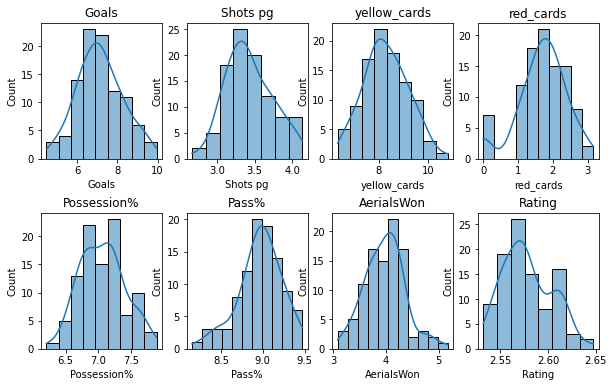

In [72]:
fig = plt.subplots(figsize=(10, 6))

for i,value in zip(range(241,249,1),numeric_cols):
    ax = plt.subplot(i)
    sns.histplot(df_sqrt[value], kde=True)
    ax.set_title(value)
    
plt.subplots_adjust(hspace=0.4)
plt.show()


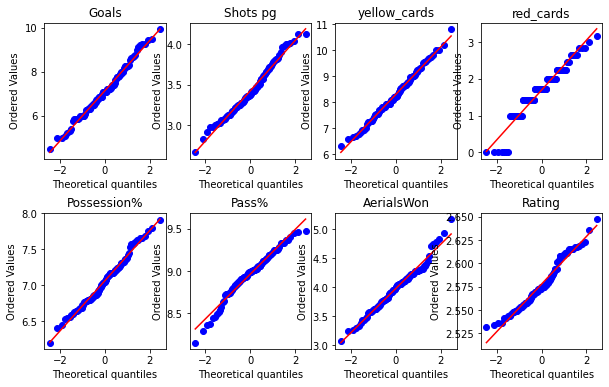

In [195]:
fig = plt.subplots(figsize=(10, 6))

for i,value in zip(range(241,249,1),numeric_cols):
    ax = plt.subplot(i)
    stats.probplot(df_sqrt[value],plot=plt)
    ax.set_title(value)

plt.subplots_adjust(hspace=0.4)
plt.show()

We can see a skew reduction of the data distribution the square root transformation have a better performance.

<h4>Scale</h4>

In [74]:
scaler = RobustScaler()

Robust Scaler is better when we have many outliners

In [75]:
df_sqrt_robust = pd.DataFrame(data=scaler.fit_transform(df_sqrt), columns=numeric_cols)
df_sqrt_robust.head()

,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,1.347120,1.341988,-1.196233,-0.416651,1.580092,1.544366,-0.905923,1.972828
1,1.901620,1.705878,-1.320642,0.000000,1.208253,0.853666,-0.876859,1.664949
2,1.454913,1.110573,0.273905,1.197766,1.484496,1.561876,-1.938387,1.304072
3,1.419194,1.198061,0.025394,-0.416651,1.796553,1.596867,-1.576751,1.252369
4,0.736050,0.932933,-0.555741,-0.416651,1.152436,1.245183,-1.203047,1.200628


In [76]:
df_sqrt_robust.describe()

,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,0.042904,0.102143,0.070826,-0.051559,0.019327,-0.078777,-0.061610,0.081428
std,0.745556,0.701648,0.751769,0.904703,0.731557,0.873630,0.790692,0.693550
min,-1.716746,-1.632680,-1.578251,-2.270537,-1.801926,-2.762746,-1.938387,-1.168073
25%,-0.480140,-0.387129,-0.392066,-0.416651,-0.540390,-0.515720,-0.557359,-0.475470
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.519860,0.612871,0.607934,0.583349,0.459610,0.484280,0.442641,0.524530
max,1.901620,1.705878,2.170459,1.874878,1.796553,1.596867,2.426212,1.972828


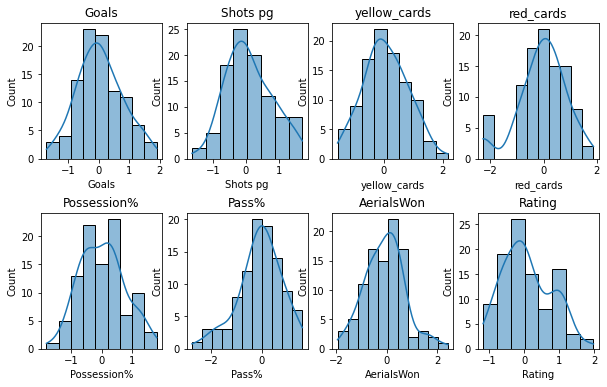

In [77]:
fig = plt.subplots(figsize=(10, 6))

for i,value in zip(range(241,249,1),numeric_cols):
    ax = plt.subplot(i)
    sns.histplot(df_sqrt_robust[value], kde=True)
    ax.set_title(value)
    
plt.subplots_adjust(hspace=0.4)
plt.show()

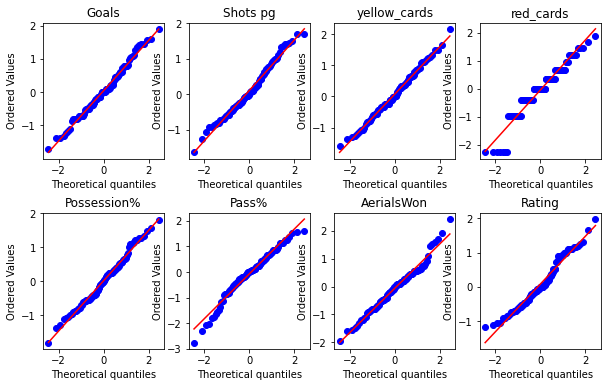

In [78]:
fig = plt.subplots(figsize=(10, 6))

for i,value in zip(range(241,249,1),numeric_cols):
    ax = plt.subplot(i)
    stats.probplot(df_sqrt_robust[value],plot=plt)
    ax.set_title(value)

plt.subplots_adjust(hspace=0.4)
plt.show()